# **Loading & Understanding Data**


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/deliveries (1).csv')


# Display basic info
print("Dataset Information:\n")
df.info()

# Display first few rows
print("\nFirst 5 rows:\n")
print(df.head())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183035 entries, 0 to 183034
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          183035 non-null  int64  
 1   inning            183035 non-null  int64  
 2   batting_team      183035 non-null  object 
 3   bowling_team      183035 non-null  object 
 4   over              183035 non-null  int64  
 5   ball              183035 non-null  int64  
 6   batter            183035 non-null  object 
 7   bowler            183034 non-null  object 
 8   non_striker       183034 non-null  object 
 9   batsman_runs      183034 non-null  float64
 10  extra_runs        183034 non-null  float64
 11  total_runs        183034 non-null  float64
 12  extras_type       9736 non-null    object 
 13  is_wicket         183034 non-null  float64
 14  player_dismissed  9053 non-null    object 
 15  dismissal_kind    9053 non-null    object 
 16

# **Handling Missing Values**

In [ ]:
# Check for missing values
print("\nMissing Values before handling:\n")
print(df.isnull().sum())


Missing Values before handling:

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   1
non_striker              1
batsman_runs             1
extra_runs               1
total_runs               1
extras_type         173299
is_wicket                1
player_dismissed    173982
dismissal_kind      173982
fielder             176563
dtype: int64



 **Total Extra Runs Conceded by Teams**



In [ ]:


# Verify missing values
print("\nMissing Values after handling:\n")
print(df.isnull().sum())


Missing Values after handling:

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [ ]:
import pandas as pd
import plotly.graph_objects as go



# Define replacements for missing values
replacements = {
    "extras_type": "No Extra",
    "player_dismissed": "Not Out",
    "dismissal_kind": "Not Applicable",
    "fielder": "No Fielder Involved"
}

# Apply replacements and convert to categorical (Fixed)
for col, replacement in replacements.items():
    df[col] = df[col].astype("category").replace({pd.NA: replacement})

# Group by bowling team and sum extra runs
top_extra_teams = df.groupby("bowling_team")["extra_runs"].sum().reset_index()

# Sort teams by extra runs in descending order
top_extra_teams = top_extra_teams.sort_values(by="extra_runs", ascending=False)

# Plot Bar Chart using Plotly
fig = go.Figure(data=[
    go.Bar(x=top_extra_teams["bowling_team"], y=top_extra_teams["extra_runs"], marker_color="red")
])

fig.update_layout(title="Total Extra Runs Conceded by Teams (Sorted)",
                  xaxis_title="Bowling Team",
                  yaxis_title="Total Extra Runs",
                  template="plotly_dark")

fig.show()



## **Descriptive statistics**


In [ ]:
# Descriptive statistics
print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

        ValueinCR  MatchPlayed  InningsBatted     NotOuts   RunsScored  \
count  237.000000   237.000000     237.000000  237.000000   237.000000   
mean     3.695781    43.383966      28.704641    6.856540   563.932489   
std      4.238092    45.338466      41.307514    9.439621  1114.287914   
min      0.200000     1.000000       0.000000    0.000000     0.000000   
25%      0.400000    20.000000       8.000000    2.000000    62.000000   
50%      1.900000    29.000000      14.000000    4.000000   148.000000   
75%      6.500000    50.000000      23.000000    7.000000   241.000000   
max     17.000000   220.000000     208.000000   73.000000  6283.000000   

             100s         50s          4s          6s  BattingAVG  ...  \
count  237.000000  237.000000  237.000000  237.000000  237.000000  ...   
mean     0.126582    2.835443   47.795359   21.025316   17.216414  ...   
std      0.545407    7.573533  103.500897   42.664728    9.156585  ...   
min      0.0000

# **Visualizations**

## **Total Runs Scored Per Over**

1.   List item
2.   List item



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("\nMissing Values before handling:\n")
print(df.isnull().sum())
# Convert 'over' to integer (if needed)
deliveries['over'] = deliveries['over'].astype(int)
deliveries = deliveries[deliveries['over'] > 0]
match_id = deliveries['match_id'].unique()[1]

# Filter data for that match
match_data = deliveries[deliveries['match_id'] == match_id]

# Group total runs per over
total_runs_per_over = match_data.groupby('over')['total_runs'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(total_runs_per_over['over'], total_runs_per_over['total_runs'], color='blue')
plt.title(f'Total Runs Scored Per Over (Match ID: {match_id})')
plt.xlabel('Over Number')
plt.ylabel('Total Runs')
plt.xticks(range(1, 21))
plt.show()


NameError: name 'deliveries' is not defined

## **Total Runs Scored Per Over (All Matches)**

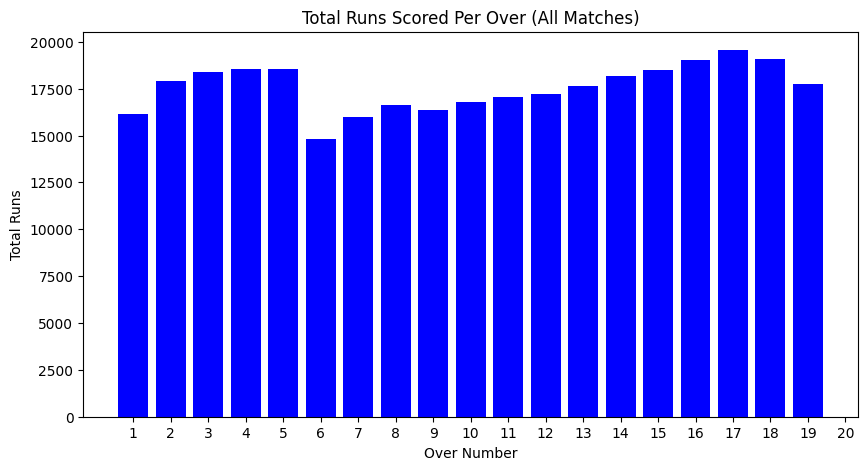

In [ ]:


# Convert 'over' to integer (if needed)
deliveries['over'] = deliveries['over'].astype(int)
deliveries = deliveries[deliveries['over'] > 0]

# Group total runs per over (across all matches)
total_runs_per_over = deliveries.groupby('over')['total_runs'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(total_runs_per_over['over'], total_runs_per_over['total_runs'], color='blue')
plt.title('Total Runs Scored Per Over (All Matches)')
plt.xlabel('Over Number')
plt.ylabel('Total Runs')
plt.xticks(range(1, 21))
plt.show()


## **Dismissal Types Distribution**

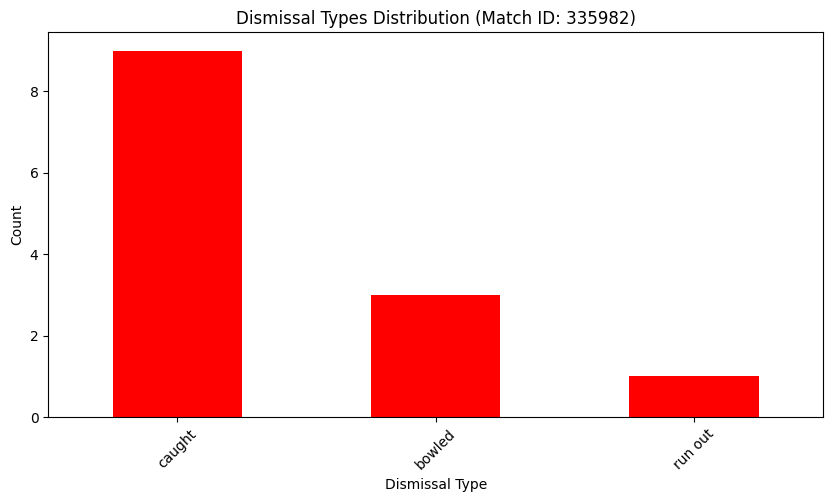

In [ ]:
# Set your match ID
match_id = 335982  # Change this to your required match ID
specific_match = deliveries[deliveries['match_id'] == match_id]
dismissal_counts = specific_match['dismissal_kind'].dropna().value_counts()
# Plot the distribution
plt.figure(figsize=(10, 5))
dismissal_counts.plot(kind='bar', color='red')
plt.title(f'Dismissal Types Distribution (Match ID: {match_id})')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Dismissal Types Distribution (All Matches)**

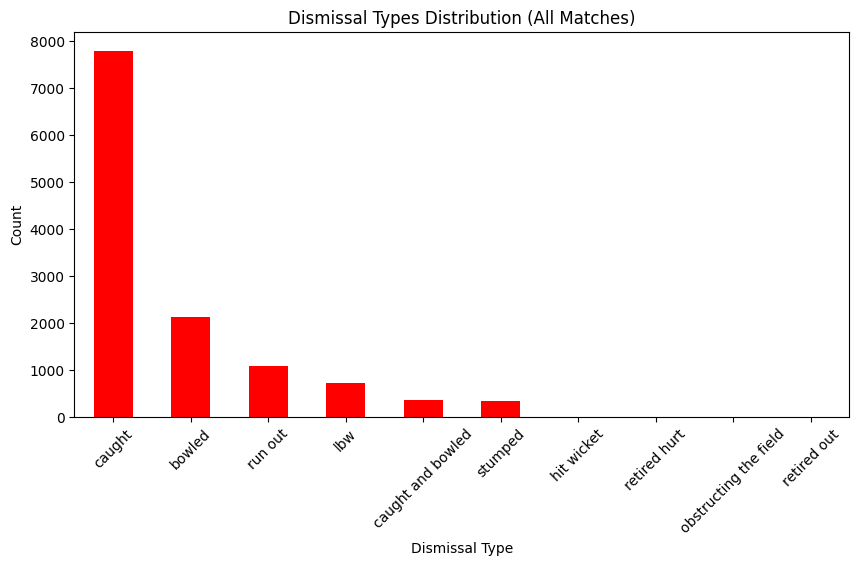

In [ ]:
dismissal_counts = deliveries['dismissal_kind'].dropna().value_counts()

# Plot the distribution
plt.figure(figsize=(10, 5))
dismissal_counts.plot(kind='bar', color='red')
plt.title('Dismissal Types Distribution (All Matches)')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **Total Extra Runs Conceded by Teams**

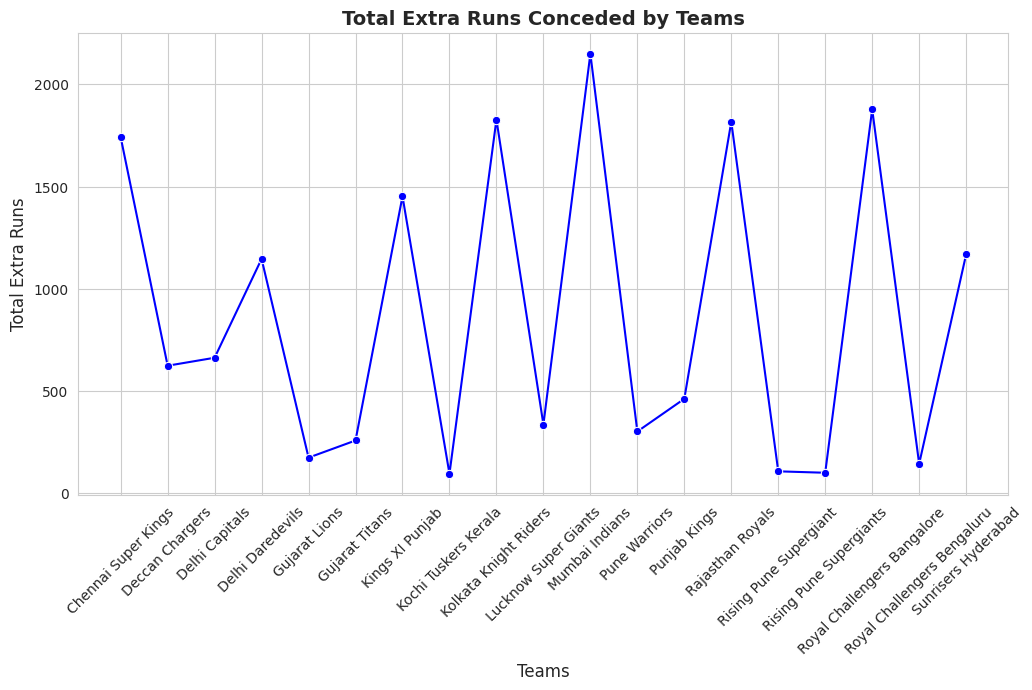

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Group by team and sum extra runs
extra_runs_by_team = deliveries.groupby('bowling_team')['extra_runs'].sum()

# Check if extra_runs_by_team is empty (to avoid errors)
if extra_runs_by_team.empty:
    print("No data found for extra runs.")
else:
    # Plot the line chart
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=extra_runs_by_team.index, y=extra_runs_by_team.values, marker='o', linestyle='-', color='b')

    # Add title and labels
    plt.title('Total Extra Runs Conceded by Teams', fontsize=14, fontweight='bold')
    plt.xlabel('Teams', fontsize=12)
    plt.ylabel('Total Extra Runs', fontsize=12)
    plt.xticks(rotation=45)  # Rotate team names for better readability

    # Show plot
    plt.show()





### **Avg_runs_per_over**

Average Runs Per Over: 17584.47


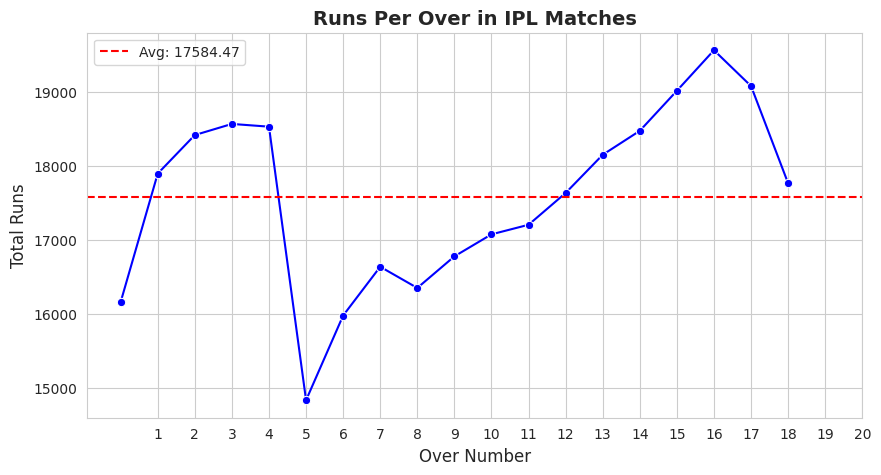

In [ ]:
avg_runs_per_over = total_runs_per_over['total_runs'].mean()
print(f'Average Runs Per Over: {avg_runs_per_over:.2f}')


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Assuming total_runs_per_over is a Pandas DataFrame with overs as index
avg_runs_per_over = total_runs_per_over['total_runs'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=total_runs_per_over.index, y=total_runs_per_over['total_runs'], marker='o', linestyle='-', color='b')

# Add a horizontal line for average runs per over
plt.axhline(y=avg_runs_per_over, color='r', linestyle='--', label=f'Avg: {avg_runs_per_over:.2f}')

# Labels and title
plt.title('Runs Per Over in IPL Matches', fontsize=14, fontweight='bold')
plt.xlabel('Over Number', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(range(1, 21))  # Assuming 20 overs per innings
plt.legend()

plt.show()


## Top 10 Batsmen by Strike Rate

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


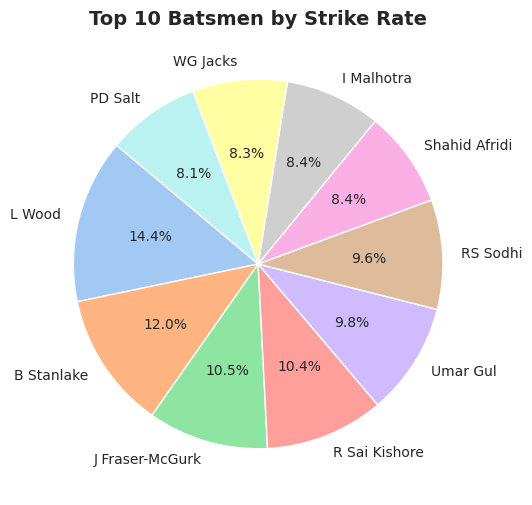

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
deliveries = pd.read_csv("deliveries.csv")
print(deliveries.columns)

# Use the correct column name ('batter' instead of 'batsman')
batsman_stats = deliveries.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'})

# Calculate Strike Rate
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball']) * 100

# Get the top 10 batsmen by Strike Rate
top_10_batsmen = batsman_stats.sort_values(by='strike_rate', ascending=False).head(10)

# Use Seaborn's pastel color palette
colors = sns.color_palette("pastel", len(top_10_batsmen))

# Plot the Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(
    top_10_batsmen['strike_rate'],
    labels=top_10_batsmen.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)

# Title and display
plt.title('Top 10 Batsmen by Strike Rate', fontsize=14, fontweight='bold')
plt.show()



# **Most Sixes Hit by Players**

> Add blockquote



<ipython-input-15-1091235b0601>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batter', y='batsman_runs', data=most_sixes, palette='viridis')


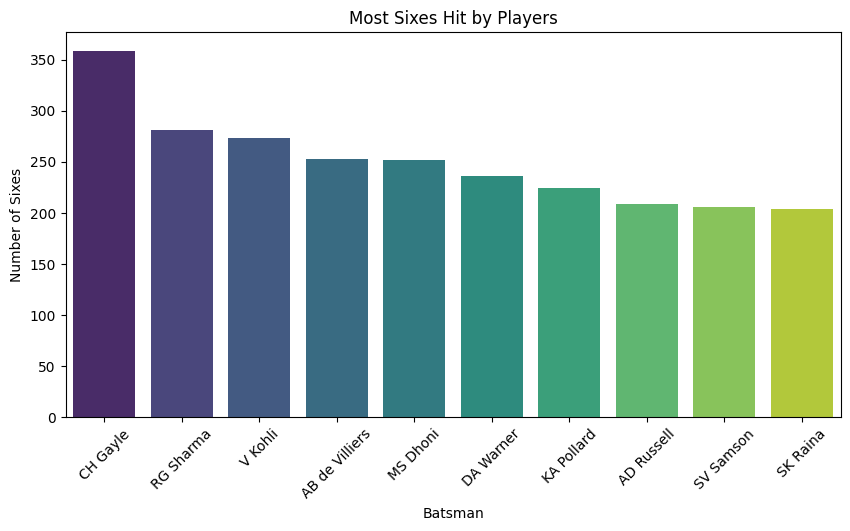

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (if not already loaded)
deliveries = pd.read_csv("deliveries.csv")

# Filter only sixes and group by batsman (use 'batter' instead of 'batsman')
most_sixes = deliveries[deliveries['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count().reset_index()

# Sort in descending order and get the top 10
most_sixes = most_sixes.sort_values(by='batsman_runs', ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x='batter', y='batsman_runs', data=most_sixes, palette='viridis')
plt.xticks(rotation=45)
plt.title('Most Sixes Hit by Players')
plt.xlabel('Batsman')
plt.ylabel('Number of Sixes')
plt.show()



## **Dot ball percentage By Bowler**

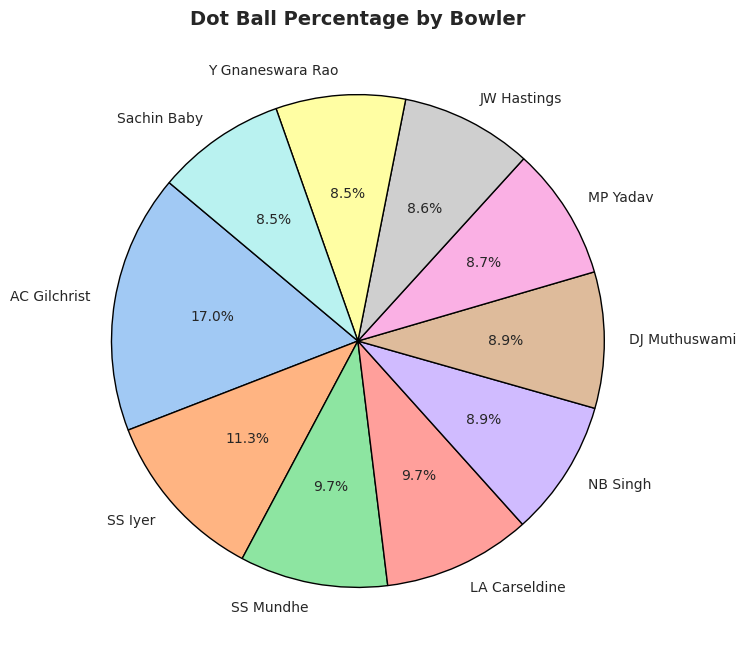

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `deliveries` DataFrame exists
# Calculate dot balls and total balls for each bowler
dot_balls = deliveries[deliveries['total_runs'] == 0].groupby('bowler')['ball'].count().reset_index()
total_balls = deliveries.groupby('bowler')['ball'].count().reset_index()

# Merge and calculate dot ball percentage
dot_ball_percentage = dot_balls.merge(total_balls, on='bowler', suffixes=('_dots', '_total'))
dot_ball_percentage['dot_ball_percent'] = (dot_ball_percentage['ball_dots'] / dot_ball_percentage['ball_total']) * 100
dot_ball_percentage = dot_ball_percentage.sort_values(by='dot_ball_percent', ascending=False).head(10)

# Ensure dot_ball_percentage is not empty
if dot_ball_percentage.empty:
    print("No data available for dot ball percentage.")
else:
    # Use a pastel color palette for better visibility
    colors = sns.color_palette("pastel", len(dot_ball_percentage))

    plt.figure(figsize=(8, 8))
    plt.pie(
        dot_ball_percentage['dot_ball_percent'],
        labels=dot_ball_percentage['bowler'],
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        wedgeprops={'edgecolor': 'black'}
    )

    plt.title('Dot Ball Percentage by Bowler', fontsize=14, fontweight='bold')
    plt.show()




### **top 10 bowlers conceding most boundaries**

<ipython-input-26-f3f875eec9f6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bowler', y='batsman_runs', data=boundaries, palette='coolwarm')


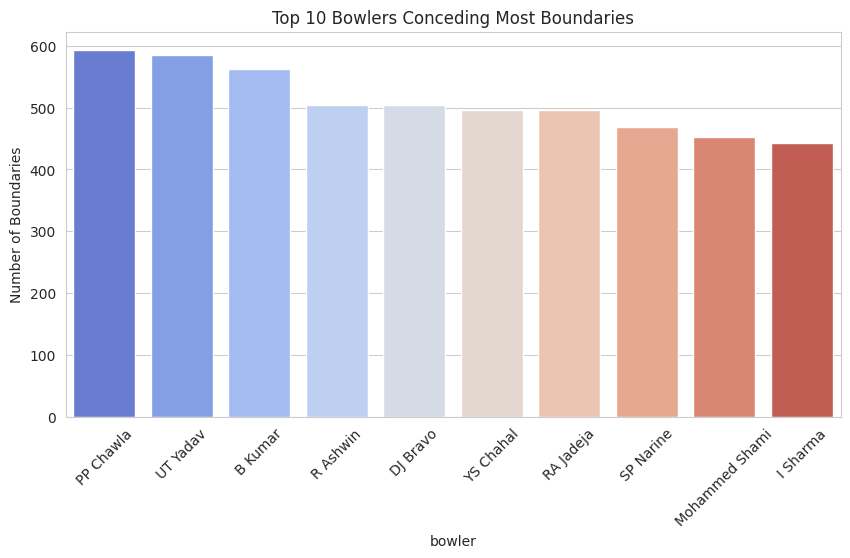

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter deliveries where batsman scored 4 or 6
boundaries = deliveries[deliveries['batsman_runs'].isin([4, 6])].groupby('bowler')['batsman_runs'].count().reset_index()

# Get top 10 bowlers conceding most boundaries
boundaries = boundaries.sort_values(by='batsman_runs', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='bowler', y='batsman_runs', data=boundaries, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Bowlers Conceding Most Boundaries')
plt.ylabel('Number of Boundaries')
plt.show()


### **Total Runs Scored in Death Overs**


In [ ]:
# Get total runs scored in overs 16-20
death_over_runs = deliveries[deliveries['over'] >= 16].groupby('match_id')['total_runs'].sum().reset_index()

# Sum all death overs runs
total_death_over_runs = death_over_runs['total_runs'].sum()
print(f"Total Runs Scored in Death Overs: {total_death_over_runs}")


Total Runs Scored in Death Overs: 75412


<ipython-input-20-112fcf863e16>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bowler', y='economy', data=economical_bowlers, palette='Blues_r')


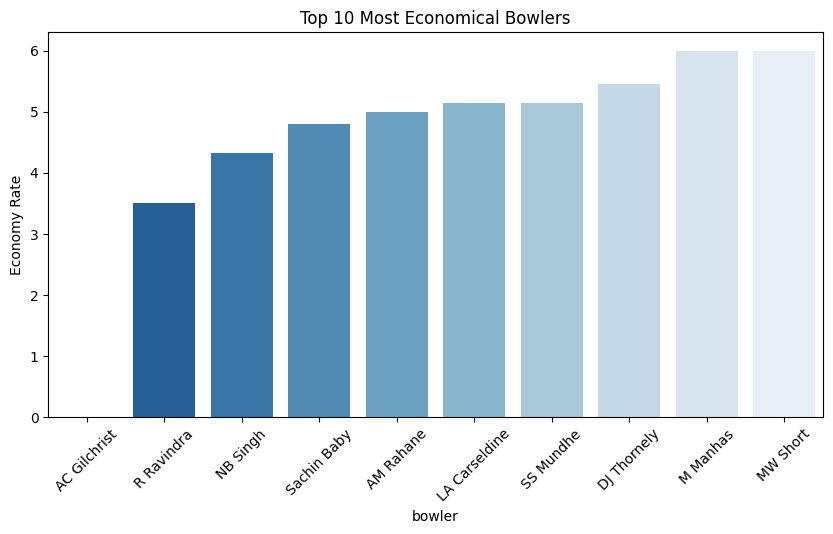

In [ ]:
# Get total runs conceded by each bowler
bowler_runs = deliveries.groupby('bowler')['total_runs'].sum().reset_index()
bowler_balls = deliveries.groupby('bowler')['ball'].count().reset_index()
bowler_data = bowler_runs.merge(bowler_balls, on='bowler')
bowler_data['economy'] = bowler_data['total_runs'] / (bowler_data['ball'] / 6)
economical_bowlers = bowler_data.sort_values(by='economy').head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='bowler', y='economy', data=economical_bowlers, palette='Blues_r')
plt.xticks(rotation=45)
plt.title('Top 10 Most Economical Bowlers')
plt.ylabel('Economy Rate')
plt.show()



## **Top 10 Bowlers Conceding Most Boundarie**

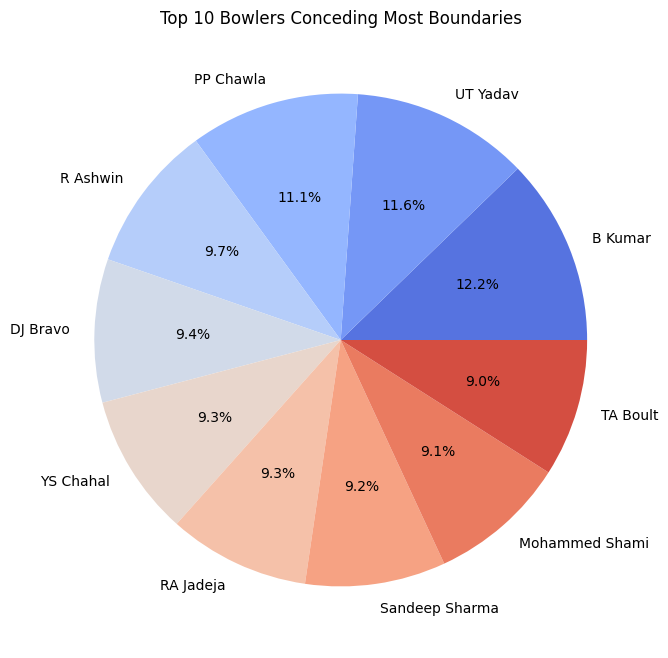

In [ ]:
plt.figure(figsize=(8, 8))
# Pie chart for bowlers conceding most boundaries
plt.pie(boundaries['batsman_runs'], labels=boundaries['bowler'], autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(boundaries)))
plt.title('Top 10 Bowlers Conceding Most Boundaries')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
deliveries = pd.read_csv("deliveries.csv")  # Ensure the correct path

# Group by team and sum extra runs
extra_runs_by_team = deliveries.groupby('bowling_team')['extra_runs'].sum()

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(extra_runs_by_team, labels=extra_runs_by_team.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Extra Runs Conceded by Teams', fontsize=14, fontweight='bold')
plt.show()
